## On the H-to-He ratio

### Solution for nuclei with spallation losses

The convection-diffusion equation for nuclei with spallation in the ISM:

$$-\frac{\partial}{\partial z} \left[ D \frac{\partial f}{\partial z} \right] + \frac{f}{\tau_{\rm sp}} = Q_0 \delta(z)$$

where the spallation time scale is given by

$$\tau_{\rm sp} = \frac{1}{n_{\rm ISM} \sigma_{\rm sp} v}$$

Here we approximate the gas density as $n_{\rm ISM} \sim 2 h n_d \delta(z)$, i.e we assume that the spallation process only occurs in the disk.

Assuming boundary conditions $f(z = \pm H) = 0$, the solution (see appendix) can be found: 

$$f_0 = \frac{Q_0 H}{2 D} \frac{1}{1 + \chi / \chi_{\rm sp}} = \frac{Q_0}{2 m_p n_d h v} \frac{\chi}{1 + \chi / \chi_{\rm sp}}$$



In [1]:
def grammage(R):
    """Compute grammage as a single power-law"""
    chi_0 = 10.
    R_0 = 4.
    delta = 0.34
    return chi_0 * (R / R_0)**(-delta) 

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


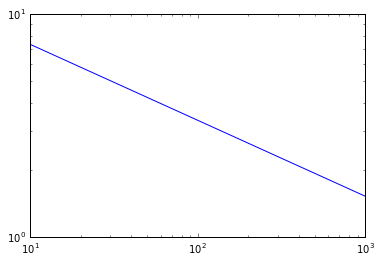

In [2]:
import matplotlib.pyplot as plt
import numpy as np
R = np.logspace(1, 3, 100)
plt.plot(R, grammage(R))
plt.xscale('log'), plt.yscale('log')
plt.show()

### Measurements of the H-to-He ratio (time interval > 2000)

In [3]:
def plot_data(filename, slope_plot, color, fmt, label):
    T, y, err_y_lo, err_y_up = np.loadtxt(filename,skiprows=2,usecols=(0,3,8,9),unpack=True)
    y_err = [T**slope_plot * err_y_lo, T**slope_plot * err_y_up]
    plt.errorbar(T, T**slope_plot * y, yerr=y_err, fmt=fmt, color=color)    

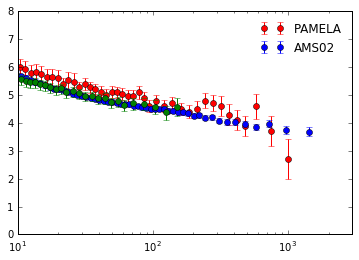

In [17]:
plt.close()
plot_data('data/PAMELA.txt', 0, 'r', 'o', 'PAMELA')
plot_data('data/AMS02.txt', 0, 'b', 'o', 'AMS02')
plot_data('data/BESS-PolarII.txt', 0, 'g', 'o', 'BESSII')
plt.xscale('log')
plt.ylim([0, 8]), plt.xlim([10, 3e3])
plt.legend(['PAMELA', 'AMS02'], frameon=False)
plt.show()